In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [67]:
dir = "/kaggle/input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir): 
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [68]:
len(train_data)

140000

In [69]:
val_dir = "/kaggle/input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [70]:
len(val_data)

15209

In [71]:
random.shuffle(train_data)
random.shuffle(val_data)

In [72]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [73]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [74]:
LB = LabelBinarizer() #For converting characters into numeric form for machine recognization
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [75]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)#Proper format resize of image so that model could be trained without any error
train_Y = np.array(train_Y)

In [76]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [77]:
print(train_X.shape,val_X.shape)#Validaton - Testing during training for better model performance

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [78]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [79]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))#Dropout - Hypertuning parameter to improve model
 
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(35, activation='softmax'))#It gives multiple op like in binary it gives only 2 value

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model1.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [82]:
history = model1.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6864 - loss: 1.0428 - val_accuracy: 0.8955 - val_loss: 0.3343
Epoch 2/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8778 - loss: 0.3616 - val_accuracy: 0.9140 - val_loss: 0.2575
Epoch 3/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8946 - loss: 0.3073 - val_accuracy: 0.9149 - val_loss: 0.2453
Epoch 4/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9033 - loss: 0.2768 - val_accuracy: 0.9223 - val_loss: 0.2372
Epoch 5/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9095 - loss: 0.2593 - val_accuracy: 0.9072 - val_loss: 0.2619
Epoch 6/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9134 - loss: 0.2459 - val_accuracy: 0.9218 - val_loss: 0.2255
Epoch 7/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9160 - loss: 0.2352 - val_accuracy: 0.9212 - val_loss: 0.2328
Epoch 8/10
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9199 - loss: 0

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9279
Recall: 0.9236
F1 Score: 0.9240


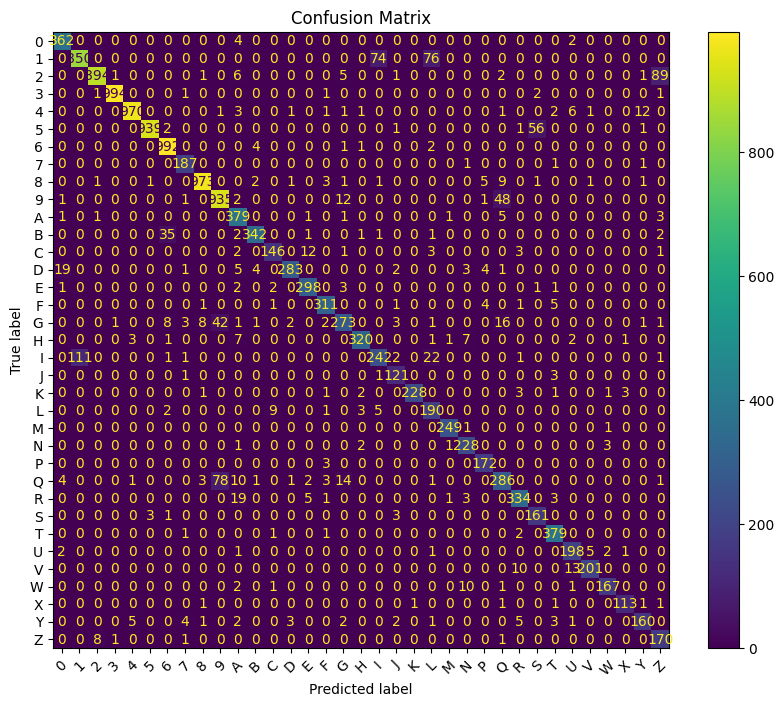

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predictions
val_pred = model1.predict(val_X)
val_pred_classes = np.argmax(val_pred, axis=1)  # Predicted class indices
val_true_classes = np.argmax(val_Y, axis=1)    # True class indices

# Calculate Metrics
precision = precision_score(val_true_classes, val_pred_classes, average='weighted')
recall = recall_score(val_true_classes, val_pred_classes, average='weighted')
f1 = f1_score(val_true_classes, val_pred_classes, average='weighted')

# Print Metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_pred_classes)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LB.classes_)
plt.figure(figsize=(10, 8))
disp.plot(cmap='viridis', xticks_rotation=45, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


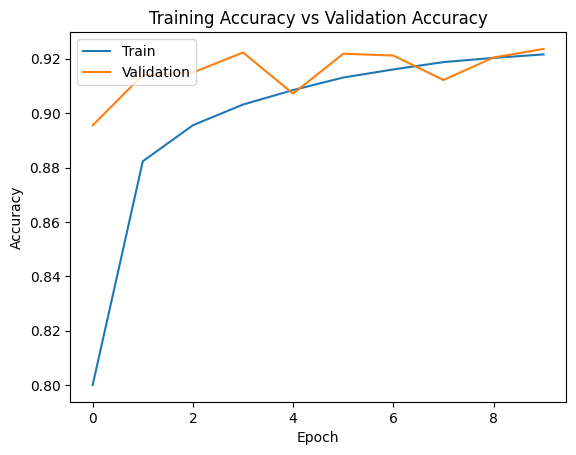

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

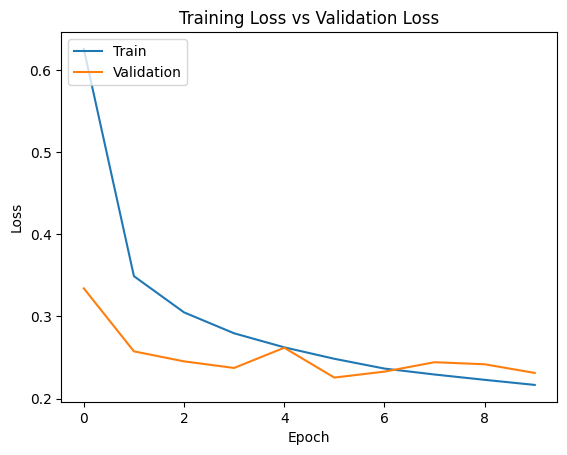

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [86]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [87]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)  # Load the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Thresholding
    dilated = cv2.dilate(thresh1, None, iterations=2)  # Dilation

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Find contours
    cnts = imutils.grab_contours(cnts)  # Grab contours
    cnts = sort_contours(cnts, method="left-to-right")[0]  # Sort contours

    # Loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:  # Filter small contours
            (x, y, w, h) = cv2.boundingRect(c)  # Get bounding box
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle
            roi = gray[y:y + h, x:x + w]  # Extract the region of interest

            # Threshold the ROI
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)  # Resize to 32x32
            thresh = thresh.astype("float32") / 255.0  # Normalize
            thresh = np.expand_dims(thresh, axis=-1)  # Expand dimensions
            thresh = thresh.reshape(1, 32, 32, 1)  # Reshape for the model

            # Predict the character
            ypred = model1.predict(thresh)
            ypred = LB.inverse_transform(ypred)
            [x] = ypred
            letters.append(x)

    return letters, image #image here is the whole image of a particular word

In [88]:
def get_word(letter):
    word = "".join(letter)
    return word

In [175]:
def show_image(image_path):
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors in Matplotlib
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.show()
    

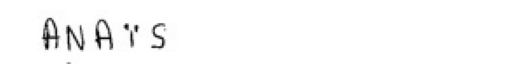

In [176]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00443.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ANAYS


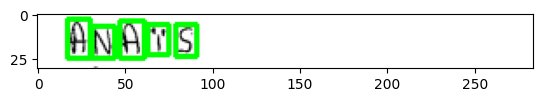

In [143]:
letter, image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00443.jpg")
word = get_word(letter)

# Output the recognized word and show the image
print(word)  # Prints the recognized word
plt.imshow(image)
plt.show()


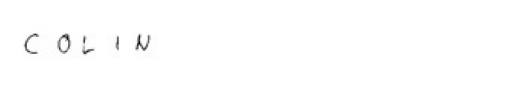

In [177]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00268.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
C0Z1N


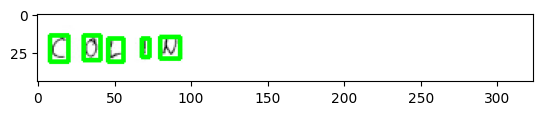

In [144]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00268.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()


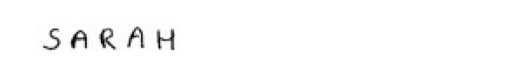

In [182]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00254.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
SARAH


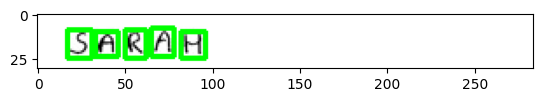

In [146]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00254.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()

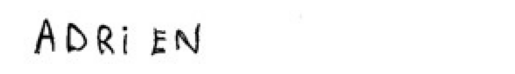

In [183]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00405.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ADRIEN


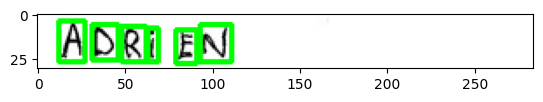

In [147]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00405.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()

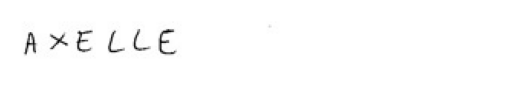

In [184]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00429.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
AXELLE


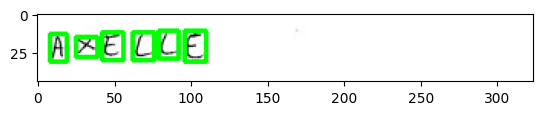

In [149]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00429.jpg")
word = get_word(letter)
print(word)
plt.imshow(image) 
plt.show()


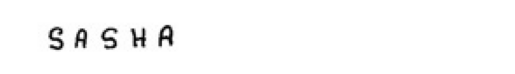

In [185]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00319.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
SASHA


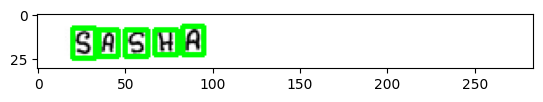

In [150]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00319.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()

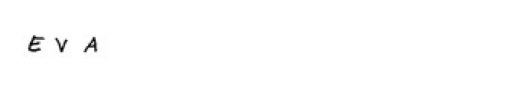

In [186]:
dataset_path = "/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00813.jpg"  # Replace with your image path
show_image(dataset_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
EVA


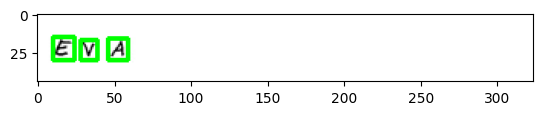

In [173]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00813.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)